In [1]:
# Import libraries
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.base import BaseEstimator
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, classification_report, roc_auc_score

In [2]:
# Lead train and test datasets
fashion_mnist_train = pd.read_csv("fashion-mnist_train.csv")
fashion_mnist_test = pd.read_csv("fashion-mnist_test.csv")

In [3]:
# Check training data shape
fashion_mnist_train.shape

(60000, 785)

In [4]:
# Check training data shape
fashion_mnist_test.shape

(10000, 785)

In [5]:
fashion_mnist_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# Separate target and features for training set
target_train = fashion_mnist_train["label"]
features_train = fashion_mnist_train.drop(["label"], axis = 1)

In [7]:
# Sanity Check
features_train.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,5,0,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,1,2,0,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# Print shapes of target and features
print(target_train.shape)
print(features_train.shape)

(60000,)
(60000, 784)


In [9]:
# Separate target and features for training set
target_test = fashion_mnist_test["label"]
features_test = fashion_mnist_test.drop(["label"], axis = 1)
# Print shapes of target and features
print(target_test.shape)
print(features_test.shape)

(10000,)
(10000, 784)


The **class labels for Fashion MNIST** are: 

    Label   Description 

    0         T-shirt/top 
    
    1         Trouser 
    
    2         Pullover 
    
    3         Dress 
    
    4         Coat 
    
    5         Sandal 
    
    6         Shirt 
    
    7         Sneaker 
    
    8         Bag 
    
    9         Ankle boot

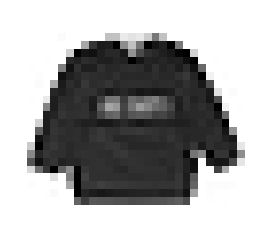

Label: 2


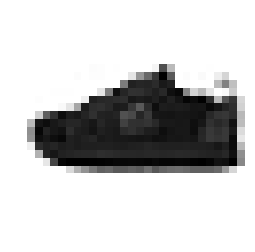

Label: 7


In [10]:
# View the first image
first_image = features_train.iloc[0]
first_image = np.array(first_image, dtype = "float")
pixels = first_image.reshape((28, 28))
plt.imshow(pixels, cmap = "gray_r")
plt.axis("off")
plt.show()
print ("Label:", target_train.iloc[0])

# View last image 
last_image = features_train.iloc[-1]
last_image = np.array(last_image, dtype = "float")
pixels = last_image.reshape((28, 28))
plt.imshow(pixels, cmap = "gray_r")
plt.axis("off")
plt.show()
print ("Label:", target_train.iloc[-1])

In [11]:
# Use sklearn StandardScaler to scale pixel values
from sklearn.preprocessing import StandardScaler
# Create scale object
scaler = StandardScaler()
# Fit scaler to training data only
scaler_fit = scaler.fit(features_train)
# Transform both train and test data with the trained scaler
X_train = scaler_fit.transform(features_train)
X_test = scaler_fit.transform(features_test)

In [12]:
import xgboost as xgb
# Create XGB Classifier object
xgb_clf = xgb.XGBClassifier(objective = "multi:softmax", tree_method = "gpu_exact", 
                            predictor = "gpu_predictor", verbosity = True)
# Fit model
xgb_model = xgb_clf.fit(X_train, target_train)
# Predictions
y_train_preds = xgb_model.predict(X_train)
y_test_preds = xgb_model.predict(X_test)
# Print F1 scores and Accuracy
print("Training F1 Micro Average: ", f1_score(target_train, y_train_preds, average = "micro"))
print("Test F1 Micro Average: ", f1_score(target_test, y_test_preds, average = "micro"))
print("Test Accuracy: ", accuracy_score(target_test, y_test_preds))

Training F1 Micro Average:  0.87975
Test F1 Micro Average:  0.8667
Test Accuracy:  0.8667


/usr/lib/python3/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/lib/python3/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [15]:
import xgboost as xgb

# Create XGB Classifier object
xgb_clf = xgb.XGBClassifier(tree_method = "gpu_exact", predictor = "gpu_predictor", verbosity = True,
                            objective = "multi:softmax")

In [16]:
# Create parameter grid
parameters = {"learning_rate": [0.1, 0.01, 0.001],
               "gamma" : [0.01, 0.1, 0.3, 0.5, 1, 1.5, 2],
               "max_depth": [2, 4, 7, 10],
               "colsample_bytree": [0.3, 0.6, 0.8, 1.0],
               "subsample": [0.2, 0.4, 0.5, 0.6, 0.7],
               "reg_alpha": [0, 0.5, 1],
               "reg_lambda": [1, 1.5, 2, 3, 4.5],
               "min_child_weight": [1, 3, 5, 7],
               "n_estimators": [100, 250, 500, 1000]}

In [17]:
from sklearn.model_selection import RandomizedSearchCV
# Create RandomizedSearchCV Object
xgb_rscv = RandomizedSearchCV(xgb_clf, param_distributions = parameters, scoring = "f1_micro",
                             cv = 10, verbose = 3, random_state = 40 )

In [ ]:
# Fit the model
model_xgboost = xgb_rscv.fit(X_train, target_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] subsample=0.6, reg_lambda=1, reg_alpha=0, n_estimators=100, min_child_weight=5, max_depth=2, learning_rate=0.1, gamma=1.5, colsample_bytree=1.0 


/usr/lib/python3/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/lib/python3/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   33.6s remaining:    0.0s


[CV]  subsample=0.6, reg_lambda=1, reg_alpha=0, n_estimators=100, min_child_weight=5, max_depth=2, learning_rate=0.1, gamma=1.5, colsample_bytree=1.0, score=0.8416666666666667, total=  32.8s
[CV] subsample=0.6, reg_lambda=1, reg_alpha=0, n_estimators=100, min_child_weight=5, max_depth=2, learning_rate=0.1, gamma=1.5, colsample_bytree=1.0 


/usr/lib/python3/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/lib/python3/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.1min remaining:    0.0s


[CV]  subsample=0.6, reg_lambda=1, reg_alpha=0, n_estimators=100, min_child_weight=5, max_depth=2, learning_rate=0.1, gamma=1.5, colsample_bytree=1.0, score=0.8418333333333333, total=  32.7s
[CV] subsample=0.6, reg_lambda=1, reg_alpha=0, n_estimators=100, min_child_weight=5, max_depth=2, learning_rate=0.1, gamma=1.5, colsample_bytree=1.0 


/usr/lib/python3/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/lib/python3/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=0.6, reg_lambda=1, reg_alpha=0, n_estimators=100, min_child_weight=5, max_depth=2, learning_rate=0.1, gamma=1.5, colsample_bytree=1.0, score=0.8385, total=  32.8s
[CV] subsample=0.6, reg_lambda=1, reg_alpha=0, n_estimators=100, min_child_weight=5, max_depth=2, learning_rate=0.1, gamma=1.5, colsample_bytree=1.0 


/usr/lib/python3/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/lib/python3/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=0.6, reg_lambda=1, reg_alpha=0, n_estimators=100, min_child_weight=5, max_depth=2, learning_rate=0.1, gamma=1.5, colsample_bytree=1.0, score=0.8361666666666666, total=  32.8s
[CV] subsample=0.6, reg_lambda=1, reg_alpha=0, n_estimators=100, min_child_weight=5, max_depth=2, learning_rate=0.1, gamma=1.5, colsample_bytree=1.0 


/usr/lib/python3/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/lib/python3/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=0.6, reg_lambda=1, reg_alpha=0, n_estimators=100, min_child_weight=5, max_depth=2, learning_rate=0.1, gamma=1.5, colsample_bytree=1.0, score=0.8471666666666667, total=  32.8s
[CV] subsample=0.6, reg_lambda=1, reg_alpha=0, n_estimators=100, min_child_weight=5, max_depth=2, learning_rate=0.1, gamma=1.5, colsample_bytree=1.0 


/usr/lib/python3/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/lib/python3/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=0.6, reg_lambda=1, reg_alpha=0, n_estimators=100, min_child_weight=5, max_depth=2, learning_rate=0.1, gamma=1.5, colsample_bytree=1.0, score=0.843, total=  32.8s
[CV] subsample=0.6, reg_lambda=1, reg_alpha=0, n_estimators=100, min_child_weight=5, max_depth=2, learning_rate=0.1, gamma=1.5, colsample_bytree=1.0 


/usr/lib/python3/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/lib/python3/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=0.6, reg_lambda=1, reg_alpha=0, n_estimators=100, min_child_weight=5, max_depth=2, learning_rate=0.1, gamma=1.5, colsample_bytree=1.0, score=0.8408333333333333, total=  32.9s
[CV] subsample=0.6, reg_lambda=1, reg_alpha=0, n_estimators=100, min_child_weight=5, max_depth=2, learning_rate=0.1, gamma=1.5, colsample_bytree=1.0 


/usr/lib/python3/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/lib/python3/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=0.6, reg_lambda=1, reg_alpha=0, n_estimators=100, min_child_weight=5, max_depth=2, learning_rate=0.1, gamma=1.5, colsample_bytree=1.0, score=0.8411666666666666, total=  32.8s
[CV] subsample=0.6, reg_lambda=1, reg_alpha=0, n_estimators=100, min_child_weight=5, max_depth=2, learning_rate=0.1, gamma=1.5, colsample_bytree=1.0 


/usr/lib/python3/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/lib/python3/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=0.6, reg_lambda=1, reg_alpha=0, n_estimators=100, min_child_weight=5, max_depth=2, learning_rate=0.1, gamma=1.5, colsample_bytree=1.0, score=0.8376666666666667, total=  32.9s
[CV] subsample=0.6, reg_lambda=1, reg_alpha=0, n_estimators=100, min_child_weight=5, max_depth=2, learning_rate=0.1, gamma=1.5, colsample_bytree=1.0 


/usr/lib/python3/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/lib/python3/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=0.6, reg_lambda=1, reg_alpha=0, n_estimators=100, min_child_weight=5, max_depth=2, learning_rate=0.1, gamma=1.5, colsample_bytree=1.0, score=0.841, total=  32.8s
[CV] subsample=0.4, reg_lambda=4.5, reg_alpha=1, n_estimators=100, min_child_weight=1, max_depth=2, learning_rate=0.01, gamma=2, colsample_bytree=0.8 


/usr/lib/python3/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/lib/python3/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=0.4, reg_lambda=4.5, reg_alpha=1, n_estimators=100, min_child_weight=1, max_depth=2, learning_rate=0.01, gamma=2, colsample_bytree=0.8, score=0.7553333333333333, total=  32.8s
[CV] subsample=0.4, reg_lambda=4.5, reg_alpha=1, n_estimators=100, min_child_weight=1, max_depth=2, learning_rate=0.01, gamma=2, colsample_bytree=0.8 


/usr/lib/python3/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/lib/python3/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=0.4, reg_lambda=4.5, reg_alpha=1, n_estimators=100, min_child_weight=1, max_depth=2, learning_rate=0.01, gamma=2, colsample_bytree=0.8, score=0.756, total=  32.8s
[CV] subsample=0.4, reg_lambda=4.5, reg_alpha=1, n_estimators=100, min_child_weight=1, max_depth=2, learning_rate=0.01, gamma=2, colsample_bytree=0.8 


/usr/lib/python3/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/lib/python3/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=0.4, reg_lambda=4.5, reg_alpha=1, n_estimators=100, min_child_weight=1, max_depth=2, learning_rate=0.01, gamma=2, colsample_bytree=0.8, score=0.7545000000000001, total=  32.9s
[CV] subsample=0.4, reg_lambda=4.5, reg_alpha=1, n_estimators=100, min_child_weight=1, max_depth=2, learning_rate=0.01, gamma=2, colsample_bytree=0.8 


/usr/lib/python3/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/lib/python3/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=0.4, reg_lambda=4.5, reg_alpha=1, n_estimators=100, min_child_weight=1, max_depth=2, learning_rate=0.01, gamma=2, colsample_bytree=0.8, score=0.7463333333333332, total=  32.8s
[CV] subsample=0.4, reg_lambda=4.5, reg_alpha=1, n_estimators=100, min_child_weight=1, max_depth=2, learning_rate=0.01, gamma=2, colsample_bytree=0.8 


/usr/lib/python3/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/lib/python3/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=0.4, reg_lambda=4.5, reg_alpha=1, n_estimators=100, min_child_weight=1, max_depth=2, learning_rate=0.01, gamma=2, colsample_bytree=0.8, score=0.7545000000000001, total=  32.8s
[CV] subsample=0.4, reg_lambda=4.5, reg_alpha=1, n_estimators=100, min_child_weight=1, max_depth=2, learning_rate=0.01, gamma=2, colsample_bytree=0.8 


/usr/lib/python3/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/lib/python3/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=0.4, reg_lambda=4.5, reg_alpha=1, n_estimators=100, min_child_weight=1, max_depth=2, learning_rate=0.01, gamma=2, colsample_bytree=0.8, score=0.7548333333333332, total=  32.9s
[CV] subsample=0.4, reg_lambda=4.5, reg_alpha=1, n_estimators=100, min_child_weight=1, max_depth=2, learning_rate=0.01, gamma=2, colsample_bytree=0.8 


/usr/lib/python3/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/lib/python3/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=0.4, reg_lambda=4.5, reg_alpha=1, n_estimators=100, min_child_weight=1, max_depth=2, learning_rate=0.01, gamma=2, colsample_bytree=0.8, score=0.7496666666666667, total=  32.8s
[CV] subsample=0.4, reg_lambda=4.5, reg_alpha=1, n_estimators=100, min_child_weight=1, max_depth=2, learning_rate=0.01, gamma=2, colsample_bytree=0.8 


/usr/lib/python3/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/lib/python3/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=0.4, reg_lambda=4.5, reg_alpha=1, n_estimators=100, min_child_weight=1, max_depth=2, learning_rate=0.01, gamma=2, colsample_bytree=0.8, score=0.7526666666666667, total=  32.8s
[CV] subsample=0.4, reg_lambda=4.5, reg_alpha=1, n_estimators=100, min_child_weight=1, max_depth=2, learning_rate=0.01, gamma=2, colsample_bytree=0.8 


/usr/lib/python3/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/lib/python3/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=0.4, reg_lambda=4.5, reg_alpha=1, n_estimators=100, min_child_weight=1, max_depth=2, learning_rate=0.01, gamma=2, colsample_bytree=0.8, score=0.754, total=  32.8s
[CV] subsample=0.4, reg_lambda=4.5, reg_alpha=1, n_estimators=100, min_child_weight=1, max_depth=2, learning_rate=0.01, gamma=2, colsample_bytree=0.8 


/usr/lib/python3/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/lib/python3/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=0.4, reg_lambda=4.5, reg_alpha=1, n_estimators=100, min_child_weight=1, max_depth=2, learning_rate=0.01, gamma=2, colsample_bytree=0.8, score=0.7541666666666665, total=  32.9s
[CV] subsample=0.2, reg_lambda=4.5, reg_alpha=0.5, n_estimators=250, min_child_weight=1, max_depth=2, learning_rate=0.001, gamma=0.5, colsample_bytree=1.0 


/usr/lib/python3/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/lib/python3/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=0.2, reg_lambda=4.5, reg_alpha=0.5, n_estimators=250, min_child_weight=1, max_depth=2, learning_rate=0.001, gamma=0.5, colsample_bytree=1.0, score=0.7111666666666666, total= 1.3min
[CV] subsample=0.2, reg_lambda=4.5, reg_alpha=0.5, n_estimators=250, min_child_weight=1, max_depth=2, learning_rate=0.001, gamma=0.5, colsample_bytree=1.0 


/usr/lib/python3/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/lib/python3/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=0.2, reg_lambda=4.5, reg_alpha=0.5, n_estimators=250, min_child_weight=1, max_depth=2, learning_rate=0.001, gamma=0.5, colsample_bytree=1.0, score=0.7195, total= 1.3min
[CV] subsample=0.2, reg_lambda=4.5, reg_alpha=0.5, n_estimators=250, min_child_weight=1, max_depth=2, learning_rate=0.001, gamma=0.5, colsample_bytree=1.0 


/usr/lib/python3/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/lib/python3/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=0.2, reg_lambda=4.5, reg_alpha=0.5, n_estimators=250, min_child_weight=1, max_depth=2, learning_rate=0.001, gamma=0.5, colsample_bytree=1.0, score=0.7113333333333334, total= 1.3min
[CV] subsample=0.2, reg_lambda=4.5, reg_alpha=0.5, n_estimators=250, min_child_weight=1, max_depth=2, learning_rate=0.001, gamma=0.5, colsample_bytree=1.0 


/usr/lib/python3/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/lib/python3/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=0.2, reg_lambda=4.5, reg_alpha=0.5, n_estimators=250, min_child_weight=1, max_depth=2, learning_rate=0.001, gamma=0.5, colsample_bytree=1.0, score=0.7093333333333334, total= 1.3min
[CV] subsample=0.2, reg_lambda=4.5, reg_alpha=0.5, n_estimators=250, min_child_weight=1, max_depth=2, learning_rate=0.001, gamma=0.5, colsample_bytree=1.0 


/usr/lib/python3/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/lib/python3/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=0.2, reg_lambda=4.5, reg_alpha=0.5, n_estimators=250, min_child_weight=1, max_depth=2, learning_rate=0.001, gamma=0.5, colsample_bytree=1.0, score=0.7226666666666667, total= 1.3min
[CV] subsample=0.2, reg_lambda=4.5, reg_alpha=0.5, n_estimators=250, min_child_weight=1, max_depth=2, learning_rate=0.001, gamma=0.5, colsample_bytree=1.0 


/usr/lib/python3/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/lib/python3/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=0.2, reg_lambda=4.5, reg_alpha=0.5, n_estimators=250, min_child_weight=1, max_depth=2, learning_rate=0.001, gamma=0.5, colsample_bytree=1.0, score=0.7208333333333333, total= 1.3min
[CV] subsample=0.2, reg_lambda=4.5, reg_alpha=0.5, n_estimators=250, min_child_weight=1, max_depth=2, learning_rate=0.001, gamma=0.5, colsample_bytree=1.0 


/usr/lib/python3/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/lib/python3/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=0.2, reg_lambda=4.5, reg_alpha=0.5, n_estimators=250, min_child_weight=1, max_depth=2, learning_rate=0.001, gamma=0.5, colsample_bytree=1.0, score=0.7065, total= 1.3min
[CV] subsample=0.2, reg_lambda=4.5, reg_alpha=0.5, n_estimators=250, min_child_weight=1, max_depth=2, learning_rate=0.001, gamma=0.5, colsample_bytree=1.0 


/usr/lib/python3/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/lib/python3/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=0.2, reg_lambda=4.5, reg_alpha=0.5, n_estimators=250, min_child_weight=1, max_depth=2, learning_rate=0.001, gamma=0.5, colsample_bytree=1.0, score=0.7171666666666667, total= 1.3min
[CV] subsample=0.2, reg_lambda=4.5, reg_alpha=0.5, n_estimators=250, min_child_weight=1, max_depth=2, learning_rate=0.001, gamma=0.5, colsample_bytree=1.0 


/usr/lib/python3/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/lib/python3/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=0.2, reg_lambda=4.5, reg_alpha=0.5, n_estimators=250, min_child_weight=1, max_depth=2, learning_rate=0.001, gamma=0.5, colsample_bytree=1.0, score=0.7135, total= 1.3min
[CV] subsample=0.2, reg_lambda=4.5, reg_alpha=0.5, n_estimators=250, min_child_weight=1, max_depth=2, learning_rate=0.001, gamma=0.5, colsample_bytree=1.0 


/usr/lib/python3/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/lib/python3/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV]  subsample=0.2, reg_lambda=4.5, reg_alpha=0.5, n_estimators=250, min_child_weight=1, max_depth=2, learning_rate=0.001, gamma=0.5, colsample_bytree=1.0, score=0.709, total= 1.3min
[CV] subsample=0.7, reg_lambda=1, reg_alpha=0, n_estimators=100, min_child_weight=7, max_depth=4, learning_rate=0.1, gamma=0.1, colsample_bytree=1.0 


In [ ]:
# Model best estimators
print("Learning Rate: ", model_xgboost.best_estimator_.get_params()["learning_rate"])
print("Gamma: ", model_xgboost.best_estimator_.get_params()["gamma"])
print("Max Depth: ", model_xgboost.best_estimator_.get_params()["max_depth"])
print("Subsample: ", model_xgboost.best_estimator_.get_params()["subsample"])
print("Max Features at Split: ", model_xgboost.best_estimator_.get_params()["colsample_bytree"])
print("Alpha: ", model_xgboost.best_estimator_.get_params()["reg_alpha"])
print("Lamda: ", model_xgboost.best_estimator_.get_params()["reg_lambda"])
print("Minimum Sum of the Instance Weight Hessian to Make a Child: ", 
      model_xgboost.best_estimator_.get_params()["min_child_weight"])
print("Number of Trees: ", model_xgboost.best_estimator_.get_params()["n_estimators"])

In [ ]:
# Create DMatrix to take full advantage of XGBoost capabilities
dmatrix_train = xgb.DMatrix(data = X_train, label = target_train)
dmatrix_test = xgb.DMatrix(data = X_test, label = target_test)